## Importing the library

In [1]:
import pandas as pd

## Analysis of dataset

In [2]:
#Loading the dataset into a dataframe named df
df = pd.read_csv("titanic_data_set.csv")
#Shows top 5 rows of the data set
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
#printing shape
print "Rows and Columns : " + str(df.shape)

Rows and Columns : (891, 12)


In [4]:
#describing dataset
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
df.describe(include = ['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Graham, Mr. George Edward",male,CA. 2343,C23 C25 C27,S
freq,1,577,7,4,644


In [6]:
#To check if there is any missing data
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

## Deriving relationship between features and survival
Here, we will analyze relationship between different features with respect to Survival. We see how different feature values show different survival chance.

In [7]:
survived = df[df["Survived"]==1]
survived.head()
print "Number of passengers who survived : " + str(len(survived)) 

Number of passengers who survived : 342


In [8]:
not_survived = df[df["Survived"]==0]
not_survived.head()
print "Number of passengers who did not survive : " + str(len(not_survived))

Number of passengers who did not survive : 549


In [9]:
s = (float(len(survived))/len(df)*100.0)
ns = (float(len(not_survived))/len(df)*100.0)
print "Percentage of passengers who survived : %.2f" %(s) + "%"
print "Percentage of passengers who did not survive : %.2f" %(ns) + "%"
print "Total number of passengers : %d" %len(df)

Percentage of passengers who survived : 38.38%
Percentage of passengers who did not survive : 61.62%
Total number of passengers : 891


#### Pclass vs Survival
Higher class passengers have better chances of survival

In [10]:
df.Pclass.value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [11]:
df.groupby('Pclass').Survived.value_counts()

Pclass  Survived
1       1           136
        0            80
2       0            97
        1            87
3       0           372
        1           119
Name: Survived, dtype: int64

#### Sex vs Survival
Females have a better chance of survival

In [12]:
df.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [13]:
df.groupby('Sex').Survived.value_counts()

Sex     Survived
female  1           233
        0            81
male    0           468
        1           109
Name: Survived, dtype: int64

#### Analysing females and males of different classes who survived

In [14]:
df.groupby(["Pclass","Sex"]).Survived.value_counts()

Pclass  Sex     Survived
1       female  1            91
                0             3
        male    0            77
                1            45
2       female  1            70
                0             6
        male    0            91
                1            17
3       female  0            72
                1            72
        male    0           300
                1            47
Name: Survived, dtype: int64

In [15]:
i = df.groupby(["Pclass","Sex"]).Survived.value_counts()
for key,values in i.iteritems():
    print key, values

(1L, 'female', 1L) 91
(1L, 'female', 0L) 3
(1L, 'male', 0L) 77
(1L, 'male', 1L) 45
(2L, 'female', 1L) 70
(2L, 'female', 0L) 6
(2L, 'male', 0L) 91
(2L, 'male', 1L) 17
(3L, 'female', 0L) 72
(3L, 'female', 1L) 72
(3L, 'male', 0L) 300
(3L, 'male', 1L) 47


In [16]:
perc_of_1class_Survived = i[1,'female',1].astype('float32') / (i[1,'female',1] + i[1, 'female' ,0]).astype('float32')
print "Percentage of females of class 1 who survived : %.2f" %(perc_of_1class_Survived *100) + "%"

Percentage of females of class 1 who survived : 96.81%


In [17]:
perc_of_1class_Survived = i[1,'male',1].astype('float32') / (i[1,'male',1] + i[1, 'male' ,0]).astype('float32')
print "Percentage of males of class 1 who survived : %.2f" %(perc_of_1class_Survived *100) + "%"

Percentage of males of class 1 who survived : 36.89%


In [18]:
perc_of_2class_Survived = i[2,'female',1].astype('float32') / (i[2,'female',1] + i[2, 'female' ,0]).astype('float32')
print "Percentage of females of class 2 who survived : %.2f" %(perc_of_2class_Survived *100) + "%"

Percentage of females of class 2 who survived : 92.11%


In [19]:
perc_of_2class_Survived = i[2,'male',1].astype('float32') / (i[2,'male',1] + i[2, 'male' ,0]).astype('float32')
print "Percentage of males of class 2 who survived : %.2f" %(perc_of_2class_Survived *100) + "%"

Percentage of males of class 2 who survived : 15.74%


In [20]:
perc_of_3class_Survived = i[3,'female',1].astype('float32') / (i[3,'female',1] + i[3, 'female' ,0]).astype('float32')
print "Percentage of females of class 3 who survived : %.2f" %(perc_of_3class_Survived *100) + "%"

Percentage of females of class 3 who survived : 50.00%


In [21]:
perc_of_3class_Survived = i[3,'male',1].astype('float32') / (i[3,'male',1] + i[3, 'male' ,0]).astype('float32')
print "Percentage of males of class 3 who survived : %.2f" %(perc_of_3class_Survived *100) + "%"

Percentage of males of class 3 who survived : 13.54%


## Visualising dataset

In [22]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set() # setting seaborn default for plots

In [23]:
import pandas as pd
df = pd.read_csv("titanic_data_set.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Plotting the graph for Pclass vs Survival

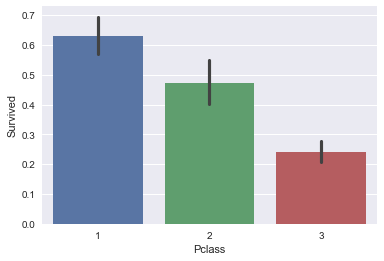

In [24]:
sns.barplot(x='Pclass', y='Survived', data=df)

#### INFERENCE FROM THE GRAPH : 
   The passengers of class 1 has the maximum survival rate, followed by class 2 and lastly class 3.


## Plotting the graph for Sex vs Survival

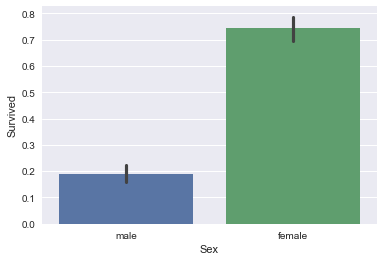

In [25]:
sns.barplot(x='Sex', y='Survived', data=df)

#### INFERENCE FROM THE GRAPH : 
The survival chances of females are way greater than that of males.

## Plotting the graph for Pclass & Age vs Survival
For Pclass & Age vs Survival, we plot a Violin Plot.

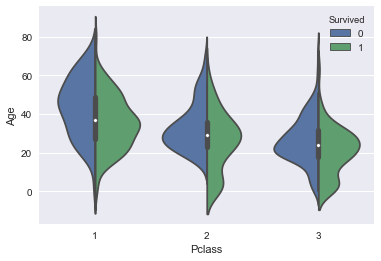

In [26]:
sns.violinplot(x='Pclass', y='Age', hue='Survived', data=df, split=True)

####  INFERENCE FROM THE GRAPH : 
1) 1st Pclass has very few children as compared to other two classes.
2) 1st Plcass has more old people as compared to other two classes.
3) Almost all children (between age 0 to 10) of 2nd Pclass survived.
4) Most children of 3rd Pclass survived.
5) Younger people of 1st Pclass survived as compared to its older people.

## Plotting the graph for Sex & Age vs Survival
For this, we will plot a Violin Plot.


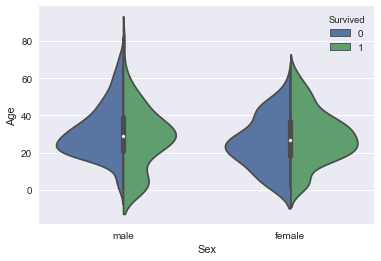

In [27]:
sns.violinplot(x='Sex', y='Age', hue='Survived', data=df, split=True)

#### INFERENCE FROM THE GRAPH : 
1) Most male children (between age 0 to 14) survived.
2) Females with age between 18 to 40 have better survival chance.

In [28]:
import pandas as pd

## Feature Extraction 

In [29]:
df = pd.read_csv('titanic_data_set.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#### Missing data

In [30]:
#Checking for missing data
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [31]:
#Missing values in Age
from sklearn.preprocessing import Imputer
age_imputer = Imputer(missing_values='NaN', strategy='mean', axis=0)
age_imputer = age_imputer.fit(df.iloc[ : , [5]])
df.iloc[:, [5]] = age_imputer.transform(df.iloc[:, [5]])
print df.head()

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


In [32]:
#Missing values in Embarked
df.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [33]:
df['Embarked'] = df['Embarked'].fillna('S')

In [34]:
#Check missing data again
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

#### Categorical Data

In [35]:
#Encoding Sex
from sklearn.preprocessing import LabelEncoder
labelencoder_sex = LabelEncoder()
df.iloc[:, [4]] = labelencoder_sex.fit_transform(df.iloc[:, [4]])
print df.head()  #Trivia : Why did we not use OneHotEncoder?

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name  Sex   Age  SibSp  Parch  \
0                            Braund, Mr. Owen Harris    1  22.0      1      0   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...    0  38.0      1      0   
2                             Heikkinen, Miss. Laina    0  26.0      0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)    0  35.0      1      0   
4                           Allen, Mr. William Henry    1  35.0      0      0   

             Ticket     Fare Cabin Embarked  
0         A/5 21171   7.2500   NaN        S  
1          PC 17599  71.2833   C85        C  
2  STON/O2. 3101282   7.9250   NaN        S  
3            113803  53.1000  C123        S  
4            373450   8.0500   NaN        S  


C:\Users\SHIVA VERMA\Anaconda2\lib\site-packages\sklearn\preprocessing\label.py:111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [36]:
#Encoding Embarked
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder_embarked = LabelEncoder()
df.iloc[:, [11]] = labelencoder_embarked.fit_transform(df.iloc[:, [11]])
print df.head()

df.Embarked.value_counts()

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name  Sex   Age  SibSp  Parch  \
0                            Braund, Mr. Owen Harris    1  22.0      1      0   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...    0  38.0      1      0   
2                             Heikkinen, Miss. Laina    0  26.0      0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)    0  35.0      1      0   
4                           Allen, Mr. William Henry    1  35.0      0      0   

             Ticket     Fare Cabin  Embarked  
0         A/5 21171   7.2500   NaN         2  
1          PC 17599  71.2833   C85         0  
2  STON/O2. 3101282   7.9250   NaN         2  
3            113803  53.1000  C123         2  
4            373450   8.0500   NaN         2  


2    646
0    168
1     77
Name: Embarked, dtype: int64

In [37]:
#One Hot Encoding Pclass and Embarked
df = pd.get_dummies(df, columns=['Pclass', 'Embarked'])
df.head()

,PassengerId,Survived,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Pclass_1,Pclass_2,Pclass_3,Embarked_0,Embarked_1,Embarked_2
0,1,0,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,0,0,1,0,0,1
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,1,0,0,1,0,0
2,3,1,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,0,1,0,0,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,1,0,0,0,0,1
4,5,0,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,0,0,1,0,0,1


#### Creating new features
Combining SibSp & Parch feature, we create a new feature named FamilySize.

In [38]:
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1
print df.head()

   PassengerId  Survived                                               Name  \
0            1         0                            Braund, Mr. Owen Harris   
1            2         1  Cumings, Mrs. John Bradley (Florence Briggs Th...   
2            3         1                             Heikkinen, Miss. Laina   
3            4         1       Futrelle, Mrs. Jacques Heath (Lily May Peel)   
4            5         0                           Allen, Mr. William Henry   

   Sex   Age  SibSp  Parch            Ticket     Fare Cabin  Pclass_1  \
0    1  22.0      1      0         A/5 21171   7.2500   NaN         0   
1    0  38.0      1      0          PC 17599  71.2833   C85         1   
2    0  26.0      0      0  STON/O2. 3101282   7.9250   NaN         0   
3    0  35.0      1      0            113803  53.1000  C123         1   
4    1  35.0      0      0            373450   8.0500   NaN         0   

   Pclass_2  Pclass_3  Embarked_0  Embarked_1  Embarked_2  FamilySize  
0         0   

## Feature Selection

In [39]:
irrelevant_features = ['PassengerId', 'Name', 'SibSp', 'Parch', 'Ticket', 'Cabin']
df = df.drop(irrelevant_features, axis=1)
print df.head()

   Survived  Sex   Age     Fare  Pclass_1  Pclass_2  Pclass_3  Embarked_0  \
0         0    1  22.0   7.2500         0         0         1           0   
1         1    0  38.0  71.2833         1         0         0           1   
2         1    0  26.0   7.9250         0         0         1           0   
3         1    0  35.0  53.1000         1         0         0           0   
4         0    1  35.0   8.0500         0         0         1           0   

   Embarked_1  Embarked_2  FamilySize  
0           0           1           2  
1           0           0           2  
2           0           1           1  
3           0           1           2  
4           0           1           1  


### Saving prepared data to a new CSV

In [40]:
df.to_csv('titanic_prepared_data.csv', index=False)

In [41]:
df = pd.read_csv('titanic_prepared_data.csv')
df.head()

,Survived,Sex,Age,Fare,Pclass_1,Pclass_2,Pclass_3,Embarked_0,Embarked_1,Embarked_2,FamilySize
0,0,1,22.0,7.2500,0,0,1,0,0,1,2
1,1,0,38.0,71.2833,1,0,0,1,0,0,2
2,1,0,26.0,7.9250,0,0,1,0,0,1,1
3,1,0,35.0,53.1000,1,0,0,0,0,1,2
4,0,1,35.0,8.0500,0,0,1,0,0,1,1
